Name: Sudarsun S

Regno: 20BCE1699

Course Code: CSE4020


# Regression
Use data set
https://github.com/scofieldjohn/research_methods_in_psych/blob/master/week8/data/parenthood.csv



1.Explore


**a.	You should see that the data contains four columns called dadsleep, babysleep, dadgrump, and day. This is data set created by Danielle Navarrro in her textbook that explores the factors that lead to the dad being grumpy (Brenden has a 1 year old at home, so this data is also relevent to him!).**


In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/scofieldjohn/research_methods_in_psych/master/week8/data/parenthood.csv")
data.rename(columns={'dan.sleep': 'dadsleep', 'baby.sleep': 'babysleep', 'dan.grump': 'dadgrump'}, inplace=True)

In [2]:
print(data.head())
print(data.info())

   ID  dadsleep  babysleep  dadgrump  day
0   1      7.59      10.18        56    1
1   2      7.91      11.66        60    2
2   3      5.14       7.92        82    3
3   4      7.71       9.61        55    4
4   5      6.68       9.75        67    5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         100 non-null    int64  
 1   dadsleep   100 non-null    float64
 2   babysleep  100 non-null    float64
 3   dadgrump   100 non-null    int64  
 4   day        100 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.0 KB
None


**b.	When we do a regression there are two types of variables. Some variables are known as features or predictors. Often a single variable is known as the response variable or the predicted value. If we are interested in what makes the dad grumpy what are the predictors and what is the response variable?**

The predictors are dadsleep, babysleep and day. The response variable is dadgrump.

**c.	Using the seaborn `scatterplot()` command, make a scatter plots of how grumpiness changes for each of the three other variables.**


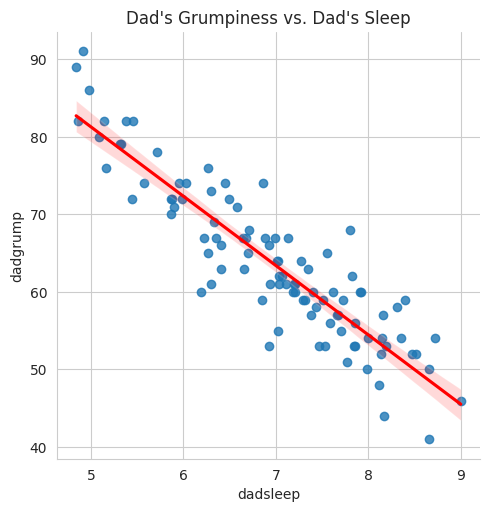

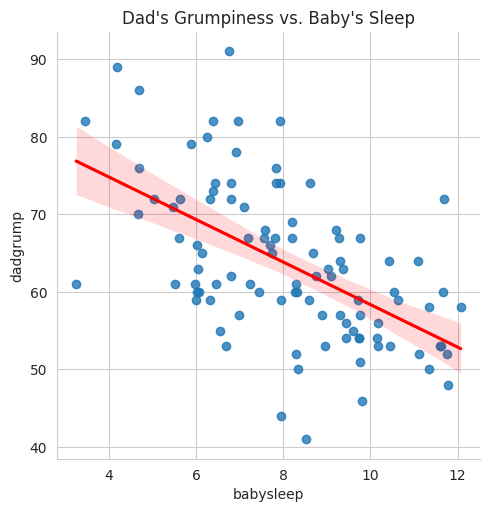

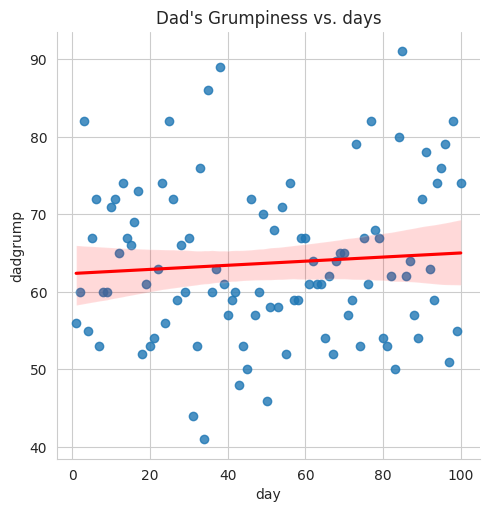

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.lmplot(x='dadsleep', y='dadgrump', data=data, line_kws={'color': 'red'})
plt.title("Dad's Grumpiness vs. Dad's Sleep")
plt.show()
print()

sns.lmplot(x='babysleep', y='dadgrump', data=data, line_kws={'color': 'red'})
plt.title("Dad's Grumpiness vs. Baby's Sleep")
plt.show()
print()

sns.lmplot(x='day', y='dadgrump', data=data, line_kws={'color': 'red'})
plt.title("Dad's Grumpiness vs. days")
plt.show()
print()

**d.	Based on your exploratory view of the data what do you think are the key relationships within this data set?**

**Dad's Sleep and Grumpiness:** We can observe a trend that suggests a potential relationship between dad's sleep duration and his grumpiness level. If dad get less sleep, he might be grumpier.

**Baby's Sleep and Grumpiness:** There is also a relationship between the baby's sleep duration and the dad's grumpiness. If the baby sleeps less, the dad might be more grumpy due to sleep deprivation.

**Day and Grumpiness:** There could be variations in the dad's grumpiness depending on the day of the week. For instance, weekdays might be more stressful leading to higher grumpiness compared to weekends.

## 2. Simple Linear Regression

a.	Manipulate the fitting by hand

let’s start simple and do things by hand.

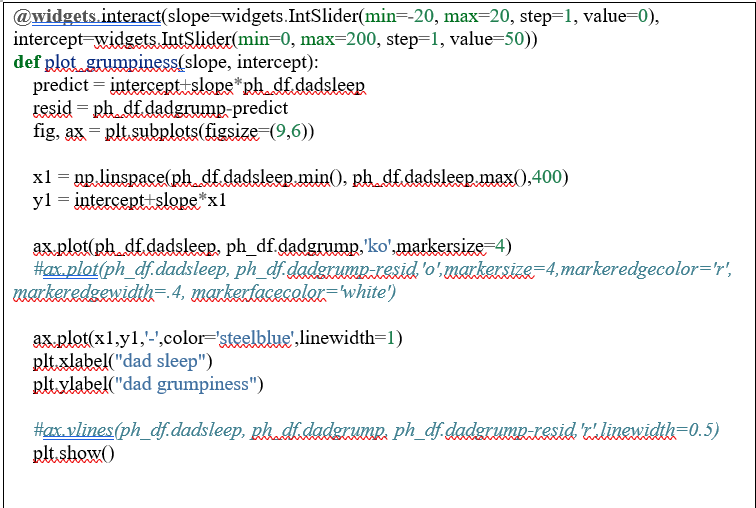


**Using the slider above, adjust the location of the line to best fit the data represented by the black dots. What value did you get for the slope and intercept?**  

slope -> -9

intercept -> 126


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


@widgets.interact(slope=widgets.IntSlider(min=-20, max=20, step=1, value=0),
intercept=widgets.IntSlider(min=0, max=200, step=1, value=50))
def plot_grumpiness(slope, intercept):
    predict = intercept+slope*data.dadsleep
    resid = data.dadgrump-predict
    fig, ax = plt.subplots(figsize=(9,6))
    x1 = np.linspace(data.dadsleep.min(), data.dadsleep.max(),400)
    y1 = intercept+slope*x1
    ax.plot(data.dadsleep, data.dadgrump, 'ko', markersize=4)
    ax.plot(data.dadsleep, data.dadgrump-resid,'o',markersize=4,markeredgecolor='r',markeredgewidth=.4, markerfacecolor='white')
    ax.plot(x1,y1,'-',color='steelblue',linewidth=1)

    plt.xlabel('dad sleep')
    plt.ylabel('dad grumpiness')
    ax.vlines(data.dadsleep, data.dadgrump, data.dadgrump-resid,'r',linewidth=0.5)
    plt.show()

interactive(children=(IntSlider(value=0, description='slope', max=20, min=-20), IntSlider(value=50, descriptio…

-8.936755819432731 125.95629163351285


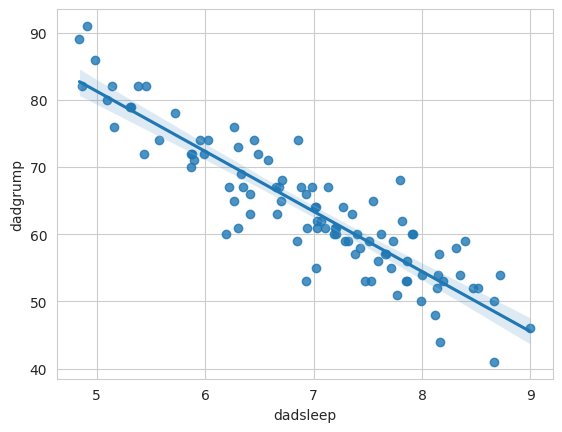

In [4]:
#manually calculating slope and intercept using bellow code snipet
from scipy.stats import linregress
sns.set_style('whitegrid')
val = sns.regplot(x ='dadsleep', y ='dadgrump', data = data)
slope, intercept, r, p, sterr = linregress(x=val.get_lines()[0].get_xdata(),
                                                       y=val.get_lines()[0].get_ydata())
print(slope,intercept)

**Find the MSE for the best fitting line**

In [6]:
from sklearn.metrics import mean_squared_error
pred_value = -9 * data['dadsleep'] + 126
mse = mean_squared_error(data['dadgrump'], pred_value)
print("Mean Squared Error for dadsleep vs dadgrump", mse)

print("\nRed line fits well with slope = -9 and intercept = 126 roughly as the error is minimal.")

Mean Squared Error for dadsleep vs dadgrump 18.548672000000007

Red line fits well with slope = -9 and intercept = 126 roughly as the error is minimal.


**b.	Identify the best fit model of Linear regression using python code  with the required plots**

Mean Squared Error: 32.58156058671905
R-squared: 0.7691338641532015
[-8.56774459] 123.59288299125913


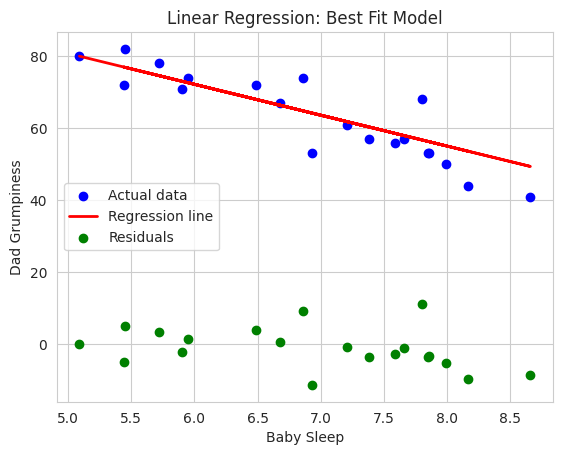

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data[['dadsleep']]
y = data['dadgrump']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(model.coef_, model.intercept_)

plt.scatter(X_test, y_test, color='blue', label='Actual data')

plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression line')


residuals = y_test - y_pred
plt.scatter(X_test, residuals, color='green', label='Residuals')

plt.xlabel("Baby Sleep")
plt.ylabel("Dad Grumpiness")
plt.title("Linear Regression: Best Fit Model")
plt.legend()
plt.show()


**c.	Look at the output parameters from q3. How do they compare to the ones you fitted by hand?**

By the above linear regression model, we came to a concluded equation for the prediction of dad's grump which can be used for any input value for dadsleep value.

y = β0 + β1 * x

y= 123.59288299125913 + (−8.936756) × x

**Aditional infromation using correlation matrix for dadsleep vs dadgrump and babysleep vs dadgrump.**

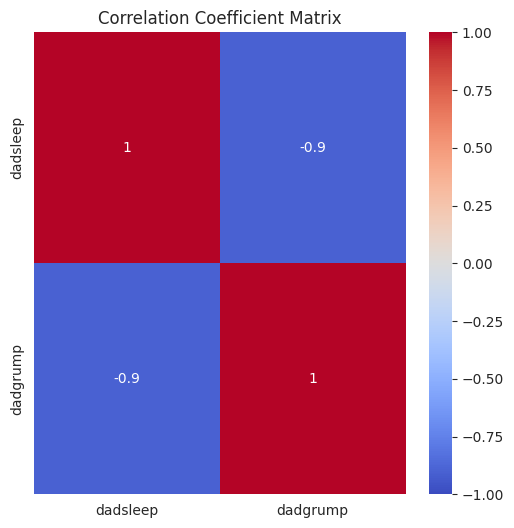

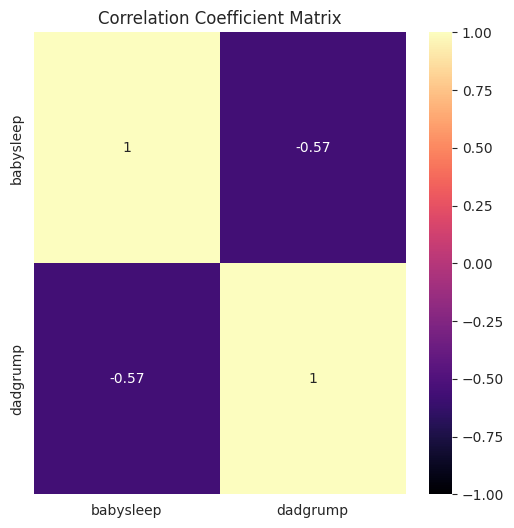

In [ ]:
correlation_matrix = data[['dadsleep', 'dadgrump']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Coefficient Matrix")
plt.show()
print()

correlation_matrix = data[['babysleep', 'dadgrump']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title("Correlation Coefficient Matrix")
plt.show()


**d.	Use your python calculator skills to predict the level of grumpiness for a dad who got 6 hours of sleep. Why is using the regression line a better way to make predictions than to grab similar cases and just use those?**



Utilizing regression analysis presents a more robust and insightful prediction method compared to simplistic case-based selection. Regression captures variable relationships comprehensively, minimizing outlier impact and addressing variability, unlike the skewed results that can arise from focusing on a few similar cases. Regression's advantage lies in its generalizability to new cases, distilling underlying data patterns for versatile predictions. Its multi-variable accommodation enables holistic impact analysis. Statistical significance testing ensures genuine relationships, in contrast to the risk of erroneous conclusions from a case-based approach. In essence, regression harnesses collective data power for accurate, adaptable, and statistically validated predictions, surpassing the limitations of similarity-based approaches across contexts.

In [10]:
input = np.array(6).reshape(-1, 1)
print(model.predict(input))

[72.18641548]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**3.	Explore Linear regression using gradient descent method and use RMSE and R2 as metric -https://towardsdatascience.com/linear-regression-5100fe32993a**




In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

x = np.array(data['dadsleep']).reshape(-1, 1)
y = np.array(data['dadgrump'])
m = 0
c = 0
L = 0.001
epochs = 100
n = float(len(x))
for i in range(epochs):
    Y_pred = m * x + c
    Dm = (-2/n) * sum(x * (y - Y_pred))
    Dc = (-2/n) * sum(y - Y_pred)
    m = m - L * Dm
    c = c - L * Dc

y_pred = data['dadsleep'].apply(lambda a:c+m*a)

rmse = np.sqrt(np.mean((y - y_pred)**2))
y_mean = np.mean(y)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2))

print("Slope (m):", m)
print("\nIntercept (c):", c)
print("\nRMSE:", rmse)
print("\nR-squared:", r2)



Slope (m): [ 7.69314413  8.24265442 11.26496104  7.55576655  9.20429744  9.89118531
  7.28101141  8.24265442  8.24265442  9.75380773  9.89118531  8.92954229
 10.16594045  9.20429744  9.06691986  9.47905259 10.02856288  7.14363383
  8.380032    7.28101141  7.41838898  8.65478714 10.16594045  7.69314413
 11.26496104  9.89118531  8.10527685  9.06691986  8.24265442  9.20429744
  6.04461324  7.28101141 10.4406956   5.63248052 11.81447134  8.24265442
  8.65478714 12.22660406  8.380032    7.8305217   8.10527685  8.24265442
  6.59412354  7.28101141  6.86887869  9.89118531  7.8305217   8.24265442
  9.61643016  6.31936839  7.96789928  9.34167501  7.96789928  9.75380773
  7.14363383 10.16594045  8.10527685  8.10527685  9.20429744  9.20429744
  8.380032    8.79216472  8.380032    8.380032    7.41838898  8.51740957
  7.14363383  8.79216472  8.92954229  8.92954229  7.8305217   8.10527685
 10.85282832  7.28101141  9.20429744  8.380032   11.26496104  9.34167501
  9.20429744  7.41838898  7.28101141  8.

**4.	Prove the relationship between regression and correlation -https://cims.nyu.edu/~brenden/courses/labincp/chapters/13/00-linearregression.html**

**Linear Regression and Correlation:**

Linear regression and correlation are closely related concepts in statistics, both aiming to quantify the relationship between two variables. While they serve slightly different purposes, they are interconnected and often used together to understand the nature of the relationship between variables.

**Correlation:**

Correlation measures the strength and direction of the linear relationship between two variables. The correlation coefficient, often denoted as "r," ranges from -1 to +1. A positive correlation indicates that as one variable increases, the other tends to increase as well. A negative correlation implies that as one variable increases, the other tends to decrease. A correlation close to 0 signifies a weak or no linear relationship.

**Linear Regression:**

Linear regression, on the other hand, is a predictive modeling technique that aims to find the best-fitting linear equation (a line) that explains the relationship between the independent variable(s) and the dependent variable. In simple linear regression, there is one independent variable. In multiple linear regression, there are multiple independent variables. The equation of the regression line is represented as: y = mx + b, where "y" is the dependent variable, "x" is the independent variable, "m" is the slope of the line, and "b" is the y-intercept.

**Relationship Between the Two:**

The relationship between linear regression and correlation lies in the correlation coefficient "r." In simple linear regression, the slope "m" of the regression line is equal to the correlation coefficient "r," multiplied by the ratio of the standard deviation of the dependent variable to the standard deviation of the independent variable. Mathematically, it can be represented as:



m = r * (SDy / SDx)



Here, "SDy" is the standard deviation of the dependent variable, and "SDx" is the standard deviation of the independent variable.

In this way, the correlation coefficient "r" provides information about how closely the data points align with a linear relationship. This aligns with the slope of the regression line in a simple linear regression model.








## 5.	Collinearity
a.	Collinearity is a situation that arises only in multiple regression. Here it means that some of the information contained in the various predictors you enter into your multiple regression model can be reconstructs as a linear combination of some of the other predictors.
Remember that the coefficients in multiple regression measure the effect of a unit increase of predictor X with all other predictors held constant. However, it is impossible to measure this effect if one of the other predictors is highly correlated or perhaps even identical to X. The effect that this has on regression estimates is that the coefficients have more uncertainty about them (i.e., the 95% confidence intervals are wider).

The following four dataset (provided in a nice blog post about collinearity by Jan Vanhove) give examples of a strong, weak, non, or nonlinear pattern of collinearity between to predictors. In each case we are interested in the multiple linear regression between the two predictors and the outcome.

outcome = β1 × predictor1 + β2 × predictor2 + β0

Strong - “https://janhove.github.io/datasets/strong_collinearity.csv”
Weak - “https://janhove.github.io/datasets/weak_collinearity.csv”
None - “https://janhove.github.io/datasets/no_collinearity.csv”
Nonlinear - https://janhove.github.io/datasets/nonlinearity.csv

This exercise asks you to use the internet to solve a problem
Read about the function `PairGrid()` on the seaborn website.

The PairGrid() is one method of showing the relationship between different variabels in a dataframe.


### **Plot a pairgrid for each of the four datasets above.**

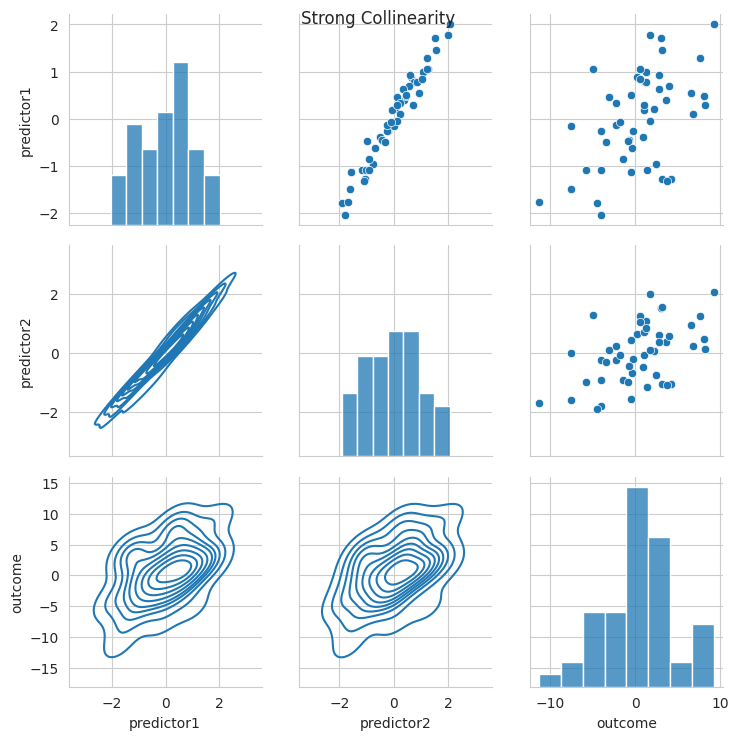

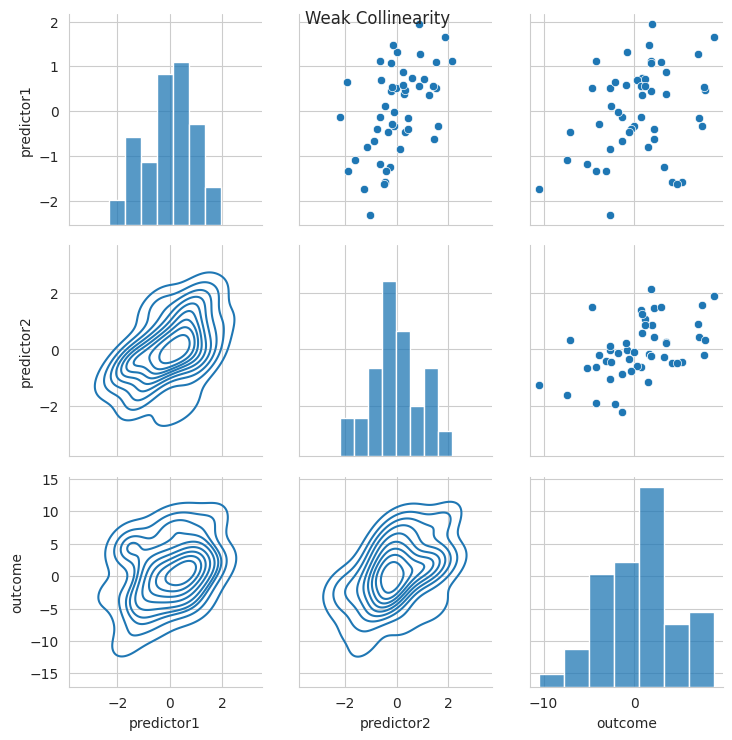

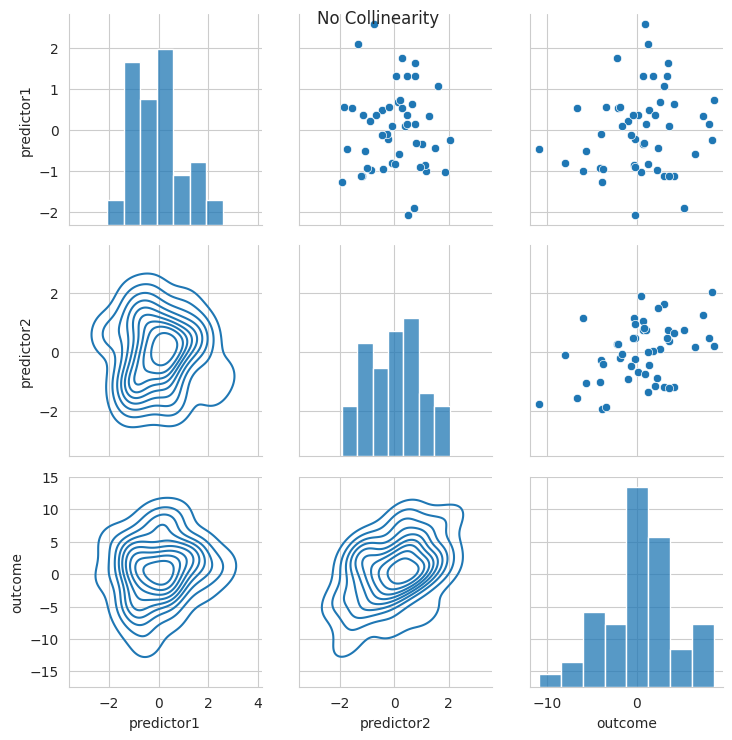

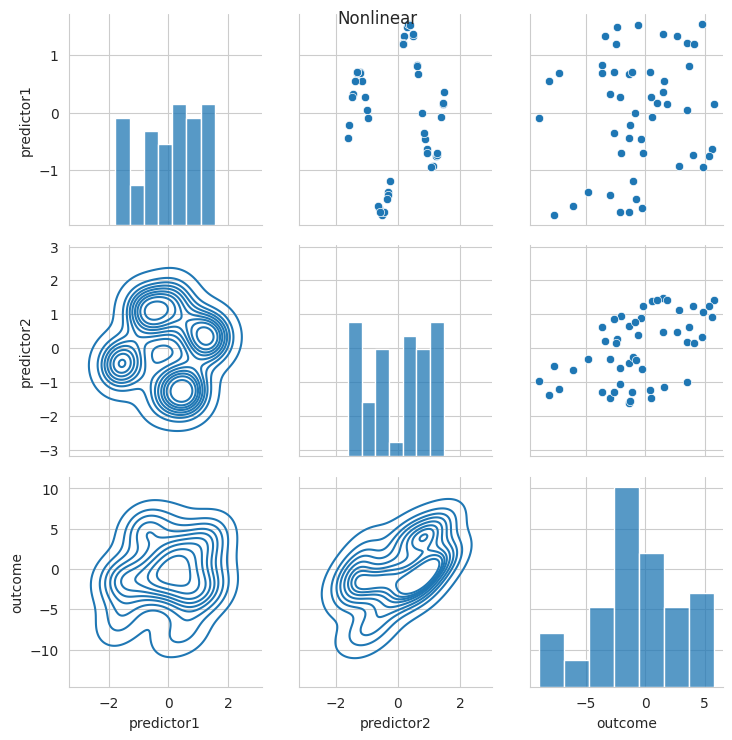

In [ ]:
strong_collinearity_url = "https://janhove.github.io/datasets/strong_collinearity.csv"
weak_collinearity_url = "https://janhove.github.io/datasets/weak_collinearity.csv"
no_collinearity_url = "https://janhove.github.io/datasets/no_collinearity.csv"
nonlinearity_url = "https://janhove.github.io/datasets/nonlinearity.csv"

strong_data = pd.read_csv(strong_collinearity_url)
weak_data = pd.read_csv(weak_collinearity_url)
no_collinearity_data = pd.read_csv(no_collinearity_url)
nonlinearity_data = pd.read_csv(nonlinearity_url)

datasets = [(strong_data, "Strong Collinearity"),
            (weak_data, "Weak Collinearity"),
            (no_collinearity_data, "No Collinearity"),
            (nonlinearity_data, "Nonlinear")]

for data, title in datasets:
    g = sns.PairGrid(data)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.histplot)
    g.fig.suptitle(title)
    plt.show()
    print()


**What do you notice about the relationship between the predictors.**

From the PairGrid visualizations of the four datasets with different patterns of collinearity, we can observe the following:

1. **Strong Collinearity Dataset:**
   In the "Strong Collinearity" dataset, there is a strong linear relationship between the two predictors. The scatterplots in the upper diagonal show a tight linear cluster, suggesting that one predictor can be predicted almost exactly from the other predictor. This indicates high collinearity between the two predictors.

2. **Weak Collinearity Dataset:**
   In the "Weak Collinearity" dataset, there is a weaker linear relationship between the predictors compared to the strong collinearity case. The scatterplots show a spread of points, indicating less predictability between the two predictors. While there is still some collinearity, it is not as pronounced as in the strong collinearity case.

3. **No Collinearity Dataset:**
   In the "No Collinearity" dataset, there is no discernible linear relationship between the predictors. The scatterplots appear scattered and lack any clear linear trend. This suggests that the predictors are not correlated or collinear.

4. **Nonlinear Collinearity Dataset:**
   In the "Nonlinear Collinearity" dataset, you might observe a nonlinear relationship between the predictors. The scatterplots could show points forming a curve or some other nonlinear pattern. This indicates that the relationship between the predictors is not adequately captured by a linear model.


**Which ones are likely to have a problem with collinearity when the outcome variable is predicted using the predictors and why?**

The "Strong Collinearity" dataset is most likely to have a severe collinearity problem when predicting the outcome variable using the predictors. The "Weak Collinearity" dataset might have some collinearity issues but to a lesser extent. The "No Collinearity" dataset is unlikely to have collinearity problems, and the impact of collinearity in the "Nonlinear Collinearity" dataset might be less straightforward due to the nonlinear relationship between predictors.






### **4.b. Fit a regression to each of the example and extract both the parameters/coefficients.**

In [ ]:
import pandas as pd
import statsmodels.api as sm

strong_collinearity_url = "https://janhove.github.io/datasets/strong_collinearity.csv"
weak_collinearity_url = "https://janhove.github.io/datasets/weak_collinearity.csv"
no_collinearity_url = "https://janhove.github.io/datasets/no_collinearity.csv"
nonlinearity_url = "https://janhove.github.io/datasets/nonlinearity.csv"

strong_data = pd.read_csv(strong_collinearity_url)
weak_data = pd.read_csv(weak_collinearity_url)
no_collinearity_data = pd.read_csv(no_collinearity_url)
nonlinearity_data = pd.read_csv(nonlinearity_url)

outcome = 'outcome'
predictors_strong = ['predictor1', 'predictor2']
predictors_weak = ['predictor1', 'predictor2']
predictors_none = ['predictor1', 'predictor2']
predictors_nonlinear = ['predictor1', 'predictor2']

model_strong = sm.OLS(strong_data[outcome], sm.add_constant(strong_data[predictors_strong])).fit()
model_weak = sm.OLS(weak_data[outcome], sm.add_constant(weak_data[predictors_weak])).fit()
model_none = sm.OLS(no_collinearity_data[outcome], sm.add_constant(no_collinearity_data[predictors_none])).fit()
model_nonlinear = sm.OLS(nonlinearity_data[outcome], sm.add_constant(nonlinearity_data[predictors_nonlinear])).fit()

coeff_strong = model_strong.params
coeff_weak = model_weak.params
coeff_none = model_none.params
coeff_nonlinear = model_nonlinear.params

print("Coefficients for Strong Collinearity:")
print(coeff_strong)

print("\nCoefficients for Weak Collinearity:")
print(coeff_weak)

print("\nCoefficients for No Collinearity:")
print(coeff_none)

print("\nCoefficients for Nonlinear Collinearity:")
print(coeff_nonlinear)


Coefficients for Strong Collinearity:
const         0.492131
predictor1    1.045283
predictor2    1.126451
dtype: float64

Coefficients for Weak Collinearity:
const         0.492131
predictor1    0.468200
predictor2    1.684434
dtype: float64

Coefficients for No Collinearity:
const         0.492131
predictor1    0.541883
predictor2    1.772377
dtype: float64

Coefficients for Nonlinear Collinearity:
const        -0.528386
predictor1    0.534315
predictor2    1.891617
dtype: float64
